In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *


%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Installed version_information.py. To use it, type:
  %load_ext version_information
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


[autoreload of version_information failed: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named version_information
]


Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
IPython 4.0.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
pandas 0.16.2
Sat Sep 12 19:52:05 2015 PDT

Import ticket purchase data

In [15]:
df_ticket = pd.DataFrame.from_csv('data/cleaned_ticket_data.csv')

In [16]:
df_ticket.head()

,tickets,is_CO,not_CO,search_vol,day_of_week,search*day
Date,,,,,,
2014-10-31,77,27,10,509,4,2036
2014-11-01,64,14,21,683,5,3415
2014-11-02,79,18,11,419,6,2514
2014-11-03,35,9,10,341,0,0
2014-11-04,38,13,7,292,1,292


Import traffic data

In [19]:
df_traffic = pd.DataFrame.from_csv('data/clean_eagle_traffic.csv')

In [20]:
df_traffic.head()

,morning_away,evening_away,all_day_away,morning_to,evening_to,all_day_to
FormattedDate,,,,,,
2014-10-31,4849,11980,16829,8015,13111,21126
2014-11-01,4903,11920,16823,8587,11379,19966
2014-11-02,5859,12952,18811,6283,9006,15289
2014-11-03,4961,7820,12781,5924,7217,13141
2014-11-04,5023,9255,14278,6290,7940,14230


Combine the traffic and ticket sales data

In [24]:
df_all = pd.concat([df_ticket, df_traffic], axis=1)

In [25]:
df_all.head()

,tickets,is_CO,not_CO,search_vol,day_of_week,search*day,morning_away,evening_away,all_day_away,morning_to,evening_to,all_day_to
2014-10-31,77,27,10,509,4,2036,4849,11980,16829,8015,13111,21126
2014-11-01,64,14,21,683,5,3415,4903,11920,16823,8587,11379,19966
2014-11-02,79,18,11,419,6,2514,5859,12952,18811,6283,9006,15289
2014-11-03,35,9,10,341,0,0,4961,7820,12781,5924,7217,13141
2014-11-04,38,13,7,292,1,292,5023,9255,14278,6290,7940,14230


In [33]:
df_corr_plot = df_all.drop(['search*day', 'morning_away', 'evening_away', 'morning_to', 'morning_to', 'evening_to'], axis=1)

In [38]:
df_corr_plot['to_day_before'] = df_corr_plot.all_day_to.shift(1)

In [39]:
df_corr_plot.head()

,tickets,is_CO,not_CO,search_vol,day_of_week,all_day_away,all_day_to,to_day_before
2014-10-31,77,27,10,509,4,16829,21126,NaN
2014-11-01,64,14,21,683,5,16823,19966,21126
2014-11-02,79,18,11,419,6,18811,15289,19966
2014-11-03,35,9,10,341,0,12781,13141,15289
2014-11-04,38,13,7,292,1,14278,14230,13141


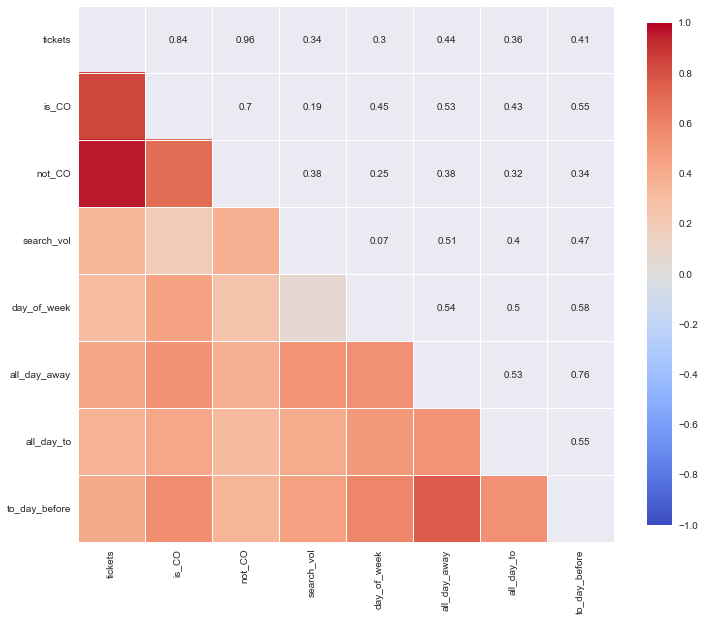

In [40]:
make_correlation_plot(df_corr_plot)

In [ ]:
#do traffic friday befopre